# Лабораторная работа №4 "Классификация в многомерном пространстве"

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from abc import ABC, abstractmethod
np.random.seed(42)

## Постановка задачи

Имеем обучающую выборку в виде векторов многомерного пространства (размерность: 4 - 6). Выборка разделена на 3 непересекающиеся классы. 

Необходимо, на основе обучающей выборки, провести классификацию тестовой выборки тремя разными способами. Способы будут описаны ниже.

## Создание выборок

In [2]:
class ABC_Sample(ABC):
  
    @abstractmethod
    def generate(self, n):
        """
        сгенерировать множество из n точек класса
        """
        pass

In [3]:
class Uniform_Sample(ABC_Sample):
    def __init__(self, limits_list):
        """
        limits_list is list with limits for each dimension
        limits_list = [[min_1, max_1], ..., [min_n, max_n]]
        """
        self.limits_list = np.array(limits_list)
        self.dim = len(limits_list)
    def generate(self,n):
        return np.random.random((n,self.dim)) * \
            (self.limits_list[:,1] - self.limits_list[:,0]) + self.limits_list[:,0]

In [4]:
class Normal_sample(ABC_Sample):
    def __init__ (self, params_list):
        """
        limits_list is list with mean and Standard deviation for each dimension
        limits_list = [[mu_1, sigma_1], ..., [mu_n, sigma_n]]
        """
        self.params_list = np.array(params_list)
        self.dim = len(params_list)
    def generate(self, n):
        return np.hstack([np.random.normal(item[0], item[1],size =  (n,1)) 
                         for item in self.params_list])

In [55]:
class MyModel (ABC):
    def fit(self,X,y):
        """
        fit model. 
        X - dots. shape (N, dim)
        y - labels. shape (N,)
        """
        self.dim = X.shape[-1]
        
        self.labels = np.unique(y)
        self.means = []
        for i in range(len(self.labels)):
            self.means.append(X[np.where(y == self.labels[i])].sum(axis = 0) /
                             (y == self.labels[i]).sum())
        self.means = np.array(self.means)
    @abstractmethod
    def predict(self,X):
        """
        predicts an unambiguous answer (only 1 class for each point)
        X - the points for which the prediction is made
        """
        pass

In [91]:
class Method_1(MyModel):
    def __init__(self):
        self.min_mean = True # по умоллчанию берется среднее
    def predict(self,X):
        dist_cl = [] # distances to classes
        for mean_cl in self.means:
            dist_cl.append(np.abs(X - mean_cl))
        print(dist_cl)
        print('--------')
        dist_cl = np.swapaxes(np.array(dist_cl),0,1)
        print(dist_cl)
        print('--------')
        if self.min_mean:
            divider = dist_cl.mean(axis = 1)
        print(divider)
        print('--------')
        dist_cl  = dist_cl/divider[:,np.newaxis,:]
        print(dist_cl)
        print('--------')
        dist_cl = dist_cl.min(axis = -1)
        print(dist_cl)
        return np.array([self.labels[i] for i in dist_cl.argmin(axis=-1)])

In [160]:
from scipy import stats

class Method_2(MyModel):
    def predict(self,X):
        dist_cl = [] # distances to classes
        for mean_cl in self.means:
            dist_cl.append(np.abs(X - mean_cl))
        print(dist_cl)
        print('--------')
        dist_cl = np.swapaxes(np.array(dist_cl),0,1)
        print(dist_cl)
        print('--------')
        numbers_cl  = dist_cl.argmin(axis = 1)
        print(numbers_cl)
        print('--------')
        numbers_cl = stats.mode(numbers_cl, axis  = 1)[0].reshape(-1)
        print(numbers_cl)
        return np.array([self.labels[i] for i in numbers_cl])

In [184]:
class Method_3(MyModel):
    def predict(self,X):
        dist_cl = [] # distances to classes
        for mean_cl in self.means:
            dist_cl.append(np.abs(X - mean_cl))
        print(dist_cl)
        print('--------')
        dist_cl = np.swapaxes(np.array(dist_cl),0,1)
        print(dist_cl)
        print('--------')
        dist_cl  = dist_cl.sum(axis = -1)
        print(dist_cl)
        print('--------')
        return np.array([self.labels[i] for i in dist_cl.argmin(axis=-1)])

In [148]:
a = np.arange(10).reshape(5,2)
a.reshape(-1)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [149]:
a + np.arange(2)

array([[ 0,  2],
       [ 2,  4],
       [ 4,  6],
       [ 6,  8],
       [ 8, 10]])

In [150]:
A = np.array([[1, 2, 3, 4], [5, 6, 7, 8]])
B = A[::-1]
C = A[:, ::-1]

D = np.stack((A, B, C))
print(D.shape)
D

(3, 2, 4)


array([[[1, 2, 3, 4],
        [5, 6, 7, 8]],

       [[5, 6, 7, 8],
        [1, 2, 3, 4]],

       [[4, 3, 2, 1],
        [8, 7, 6, 5]]])

In [151]:
# np.swapaxes(D, 0,1).min(axis=-1)

In [152]:
stats.mode(D.argmin(axis =1), axis = 1)[0].reshape(-1)

array([0, 1, 0])

In [153]:
from scipy import stats
stats.mode(np.array([1,2,1,2]))

ModeResult(mode=array([1]), count=array([2]))

In [175]:
g = Uniform_Sample([[0,1], [2,3], [4,5]])
train = g.generate(5)
train

array([[0.93436701, 2.92556851, 4.45083937],
       [0.11323805, 2.9848412 , 4.83889809],
       [0.12466268, 2.92084188, 4.86989636],
       [0.51883806, 2.59127544, 4.3990027 ],
       [0.05476164, 2.33519724, 4.80285345]])

In [176]:
yt = np.array([0,1,2,2,0])

In [219]:
md = Method_3()
md.fit(train, yt)

In [220]:
md.means

array([[0.49456433, 2.63038288, 4.62684641],
       [0.11323805, 2.9848412 , 4.83889809],
       [0.32175037, 2.75605866, 4.63444953]])

In [221]:
test =  g.generate(4)
test

array([[0.93443603, 2.35162269, 4.10142083],
       [0.48587176, 2.25677657, 4.2848729 ],
       [0.30728996, 2.8030259 , 4.53916128],
       [0.3113077 , 2.61033378, 4.71615067]])

In [222]:
md.predict(test)

[array([[0.4398717 , 0.27876019, 0.52542558],
       [0.00869257, 0.37360631, 0.34197351],
       [0.18727436, 0.17264302, 0.08768513],
       [0.18325663, 0.02004909, 0.08930426]]), array([[0.82119798, 0.63321851, 0.73747726],
       [0.37263371, 0.72806463, 0.55402518],
       [0.19405192, 0.1818153 , 0.29973681],
       [0.19806965, 0.37450742, 0.12274741]]), array([[0.61268566, 0.40443597, 0.5330287 ],
       [0.16412139, 0.49928209, 0.34957663],
       [0.0144604 , 0.04696724, 0.09528826],
       [0.01044267, 0.14572488, 0.08170114]])]
--------
[[[0.4398717  0.27876019 0.52542558]
  [0.82119798 0.63321851 0.73747726]
  [0.61268566 0.40443597 0.5330287 ]]

 [[0.00869257 0.37360631 0.34197351]
  [0.37263371 0.72806463 0.55402518]
  [0.16412139 0.49928209 0.34957663]]

 [[0.18727436 0.17264302 0.08768513]
  [0.19405192 0.1818153  0.29973681]
  [0.0144604  0.04696724 0.09528826]]

 [[0.18325663 0.02004909 0.08930426]
  [0.19806965 0.37450742 0.12274741]
  [0.01044267 0.14572488 0.0817

array([0, 0, 2, 2])

In [223]:
T1 = Uniform_Sample([[3,4], [4,5]])
T2 = Normal_sample([[1,0.1], [1,0.7]])
T3 = Uniform_Sample([[5,6], [0,1]])

In [224]:
dots1 = T1.generate(20)
dots2 = T2.generate(20)
dots3 = T3.generate(20)

In [225]:
X_train = np.concatenate([dots1,dots2,dots3 ])
X_train.shape

(60, 2)

In [226]:
y_train = np.array([1]*20 + [2]*20 + [3]*20)
y_train

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

In [227]:
cls = Method_1()
cls.fit(X_train, y_train)

In [228]:
testsample = Uniform_Sample([[0,6], [0,5]])
X_test = testsample.generate(100)

Text(0.5, 1.0, 'Test points')

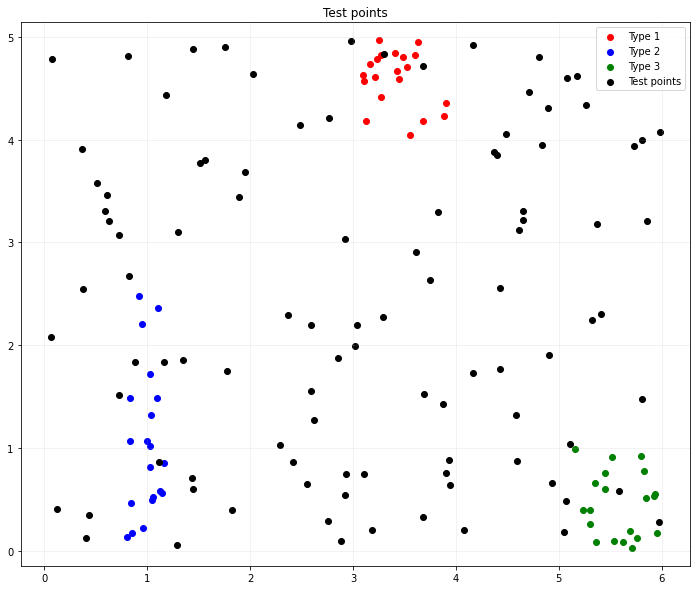

In [229]:

fig = plt.figure(figsize = (12,10))
colors = ['red', 'blue', 'green']
labels = [f'Type {i+1}' for i in range(3)]
dots_list = X_train.reshape(3,20,2)
for index,dots in enumerate(dots_list):
    plt.scatter(dots.T[0], dots.T[1], c = colors[index], label = labels[index])
plt.scatter(X_test.T[0], X_test.T[1], c='black', label = 'Test points')
plt.axis('equal')
plt.grid(alpha=0.2)
plt.legend()
plt.title('Test points')

In [230]:
y_test = cls.predict(X_test)

[array([[4.32759171e-01, 3.66500367e-01],
       [1.69400968e+00, 3.55173714e+00],
       [2.16903122e+00, 4.01245772e+00],
       [1.49015818e+00, 2.69117324e+00],
       [1.85330585e+00, 2.54006257e-01],
       [1.42101233e+00, 6.44137526e-01],
       [1.58646523e+00, 4.18969329e+00],
       [9.96658996e-01, 3.72666713e+00],
       [7.55166465e-01, 2.86379107e+00],
       [2.43912114e+00, 1.38942932e+00],
       [1.52034331e+00, 3.93166634e+00],
       [1.75754683e+00, 1.94962451e-02],
       [4.92168555e-01, 1.56302502e+00],
       [1.17431874e+00, 3.72009657e+00],
       [3.99143610e-01, 2.60097457e+00],
       [2.53629612e+00, 2.75661760e+00],
       [3.00550621e+00, 4.46523017e+00],
       [2.60354233e+00, 2.21285851e-01],
       [1.17362853e-01, 2.34821098e-01],
       [8.19552798e-01, 3.03520904e+00],
       [3.77688891e-01, 2.39673126e+00],
       [2.78055196e+00, 1.39015813e+00],
       [2.11831097e+00, 1.49634993e+00],
       [4.86666486e-01, 3.83416544e+00],
       [3.04644

Text(0.5, 1.0, 'Test points')

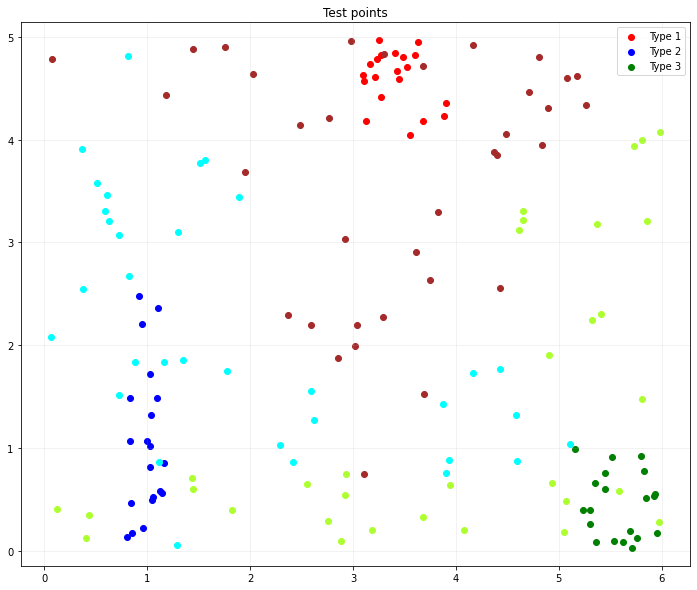

In [231]:

fig = plt.figure(figsize = (12,10))
colors = ['red', 'blue', 'green']
res_colors = ['brown', 'cyan', 'greenyellow']
labels = [f'Type {i+1}' for i in range(3)]
dots_list = X_train.reshape(3,20,2)
for index,dots in enumerate(dots_list):
    plt.scatter(dots.T[0], dots.T[1], c = colors[index], label = labels[index])
for i in range(len(X_test)):
    plt.scatter(X_test[i][0],X_test[i][1], c= res_colors[y_test[i]-1])
plt.axis('equal')
plt.grid(alpha=0.2)
plt.legend()
plt.title('Test points')

In [232]:
xx, yy = np.meshgrid(np.linspace(-1,6, 500),np.linspace(-1,6, 500))

z = cls.predict(np.c_[xx.ravel(), yy.ravel()])
Z = z.reshape(xx.shape)

[array([[4.41454007, 5.59428971],
       [4.40051201, 5.59428971],
       [4.38648396, 5.59428971],
       ...,
       [2.55740382, 1.40571029],
       [2.57143188, 1.40571029],
       [2.58545993, 1.40571029]]), array([[1.9942374 , 2.05583322],
       [1.98020934, 2.05583322],
       [1.96618128, 2.05583322],
       ...,
       [4.97770649, 4.94416678],
       [4.99173455, 4.94416678],
       [5.0057626 , 4.94416678]]), array([[6.585762  , 1.45652161],
       [6.57173394, 1.45652161],
       [6.55770588, 1.45652161],
       ...,
       [0.38618189, 5.54347839],
       [0.40020995, 5.54347839],
       [0.414238  , 5.54347839]])]
--------
[[[4.41454007 5.59428971]
  [1.9942374  2.05583322]
  [6.585762   1.45652161]]

 [[4.40051201 5.59428971]
  [1.98020934 2.05583322]
  [6.57173394 1.45652161]]

 [[4.38648396 5.59428971]
  [1.96618128 2.05583322]
  [6.55770588 1.45652161]]

 ...

 [[2.55740382 1.40571029]
  [4.97770649 4.94416678]
  [0.38618189 5.54347839]]

 [[2.57143188 1.40571029]
  

<ipython-input-233-cb0b9d516897>:8: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=cmap_light)


Text(0.5, 1.0, 'Test points')

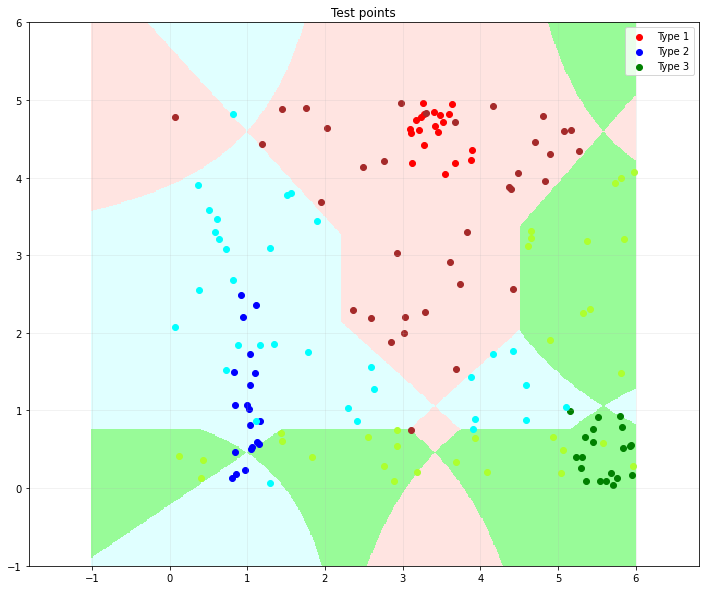

In [233]:
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
fig = plt.figure(figsize = (12,10))
colors = ['red', 'blue', 'green']
res_colors = ['brown', 'cyan', 'greenyellow']
labels = [f'Type {i+1}' for i in range(3)]

cmap_light = ListedColormap(['mistyrose', 'lightcyan', 'palegreen'])
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

dots_list = X_train.reshape(3,20,2)
for index,dots in enumerate(dots_list):
    plt.scatter(dots.T[0], dots.T[1], c = colors[index], label = labels[index])
for i in range(len(X_test)):
    plt.scatter(X_test[i][0],X_test[i][1], c= res_colors[y_test[i]-1])
plt.axis('equal')
plt.grid(alpha=0.2)
plt.legend()
plt.title('Test points')